In [1]:
from pandas import read_csv

from bowtie import bowtie as bow

%matplotlib inline

# The geometric factor
---
<span style="font-size:1.3em;">
The geometric factor is a physical quantity that characterizes a particle instrument's response to a charged particle distribution. Knowledge of the geometric factor is required to convert particle counts (directly measured quantity) to the physical unit of intensity (estimated quantity).
    
The geometric factor is most often extremely challenging - sometimes even impossible - to analytically calculate, and hence it is in many instances determined either experimentally or numerically using, e.g., Monte Carlo simulations.

The result of bowtie analysis is the geometric factor and an effective energy for an energy channel. For a more in-depth look at how the geometric factor is calculated see, e.g., ([Sullivan, 1971](https://doi.org/10.1016/0029-554X\(71\)90033-4)).
</span>

# Operational principle
---
<span style="font-size:1.3em;">
Let us consider a differential energy channel of an instrument. Assume an incoming particle intensity that follows a power law which can be expressed as $I(E) = AE^{-\gamma}$. Knowing the fact that a particle instrument counts particles $C$ such that:

\begin{align}
C = \int_{0}^{\infty} I(E) R(E)~\mathrm{d}E,
\end{align}

where $R(E)$ is the response function of an energy channel, the bowtie method aims to find a "central" or an effective energy $E_{eff}$ and an effective geometric factor $G \delta E$ [cm$^{2}$ sr MeV] for the energy channel, such that:

\begin{align}
I(E_{eff}) = \frac{C}{G \delta E}.
\end{align}

Solving for the effective geometric factor from the previous equation and substituting the first equation for $C$ yields:

\begin{align}
G \delta E = \frac{\int_{0}^{\infty} I(E) R(E)~\mathrm{d}E}{I(E_{eff})},
\end{align}
where the spectral index $\gamma$ is varied, i.e., many different intensity spectra are tried, in order to find the energy $E_{eff}$ at which $G \delta E$ varies the least between the range of spectra. This energy is called the effective energy of the energy channel, and at that energy the effective geometric factor is taken to be the geometric mean of the range of values $G \delta E$ has at that point.

The effective geometric factor $G_{I}$ [cm$^2$ sr] for an integral channel is found with a similar method, but instead of an effective energy, an effective energy threshold $E_{thr}$ is determined instead. The effective geometric factor and an effective threshold energy define an integral channel such that:
\begin{align}
I(E > E_{thr}) = \frac{C}{G_{I}}.
\end{align}
In an integral channel the intensity at energies below the threshold energy $I(E < E_{thr}) = 0$. For an integral channel the effective geometric factor is defined as follows:

\begin{align}
G_{I}(E_{thr}) = \frac{\int_0^{\infty} I(E) R(E) dE }{\int_{E_{thr}}^{\infty} I(E') dE'},
\end{align}
where a range of different spectra are again applied.

</span>

# An example on how to apply the Bowtie package for your instrument's response functions:
---
<span style="font-size:1.3em;">
    
In this example notebook we read in idealized response functions of a fictitious particle instrument. The response functions $R$ of these "boxcar" channels come in varying energy ranges, and all but the final have an identical shape of a differential energy channel, defined such that:

$$R_{i} = (H(E - E_{low,i}) - H(E - E_{high,i})),$$
where $E_{low,i}$ and $E_{high,i}$ are the lower and higher energy boundaries of the $i$th channel, and $H(x)$ is the Heaviside function. The final energy channel, "boxcar4", has the shape of an integral energy channel, that is defined such that:

$$R_{4} = H(E - E_{thr}),$$
where $E_{thr}$ is the threshold energy of the channel. This energy marks the point at which the response of the channel changes from no response to a constant response.
    
We walk through on how to initialize and use the Bowtie class to run bowtie-analysis on response functions for different particle spectra.

Finally we save the result of analysis to a csv table.
</span>

In [2]:
# The input data is given as a csv table. The channel responses must be indexed by incident energy
response_df = read_csv("boxcar_responses.csv", index_col="incident_energy")

# Display the dataframe to see that it was read in correctly
display(response_df)

,boxcar1,boxcar2,boxcar3,boxcar4
incident_energy,,,,
0.0100,0.0,0.0,0.0,0.0
0.0101,0.0,0.0,0.0,0.0
0.0102,0.0,0.0,0.0,0.0
0.0103,0.0,0.0,0.0,0.0
0.0104,0.0,0.0,0.0,0.0
...,...,...,...,...
193690.9704,0.0,0.0,0.0,1.0
195440.9770,0.0,0.0,0.0,1.0
197206.7950,0.0,0.0,0.0,1.0


In [3]:
# Initialize the Bowtie object with an energy range (in MeV) and the response data.
# The given energy range should extend over the energy regimes of all the energy channels

energy_min = 0.01
energy_max = 50.

bowtie = bow.Bowtie(energy_min=energy_min, energy_max=energy_max, data=response_df)

## About the Bowtie class
---

The `Bowtie` class contains the data that the bowtie analysis is applied on, and the energy range to be considered in the calculations. Its methods make running analysis easy and straighforward. \
`Bowtie`'s methods are:
### .set_energy_range(energy_min, energy_max):

    energy_min : {float} The minimum energy in MeV to consider. 
    energy_max : {float} The maximum energy to consider.

### .bowtie_analysis(channel, spectra, plot):
    
    channel : {str} The channel column name as it appears in the csv file.
    spectra : {Spectra} The Spectra class object, introduced in this package.
    plot : {bool} A boolean switch to produce a plot that visualizes the analysis results.

### bowtie_analysis_full_stack(spectra, plot):
    
Wrapper for `bowtie_analysis()`. Runs the analysis on all channels that appear in the input file.

In [4]:
# Next up initialize a range of spectra, starting from minimum to maximum with an amount of steps

gamma_min = -5.5
gamma_max = -2.5
num_of_spectra = 100

spectra = bow.Spectra(gamma_min=gamma_min, gamma_max=gamma_max, gamma_steps=num_of_spectra)

## About the Spectra class
---
The `Spectra` class contain the range of spectra that are applied on the response function to run bowtie analysis \
`Spectra`'s methods are:
### .set_spectral_indices(gamma_min, gamma_max):
    
    gamma_min : {float} The minimum spectral index to consider in the calculation.
    gamma_max : {float} The maximum spectral index to consider in the calculation.

### .produce_power_law(response_df) :
    
    response_df : The pandas DataFrame that contains the incident energies and respective responses.


In [5]:
# Produces the power law spectra with given spectral indices for the energies 
# in the response dataframe indices.
# The range of power law spectra are stored inside the Spectra object.
spectra.produce_power_law_spectra(response_df)

In [6]:
# The power law spectra are stored as a class variable called "power_law_spectra".
# power_law_spectra is a list of dictionaries, that contains a spectrum for each value of
# spectral index.
# User need necessarily not care about it.
spectra.power_law_spectra

[{'gamma': np.float64(-5.5),
  'spect': array([1.00000000e-30, 7.39603979e+10, 7.02705855e+10, ...,
         7.54969980e-30, 7.18530667e-30, 6.83850128e-30], shape=(1870,))},
 {'gamma': np.float64(-5.46969696969697),
  'spect': array([1.00000000e-30, 6.43463814e+10, 6.11544582e+10, ...,
         1.09240043e-29, 1.03995814e-29, 9.90033416e-30], shape=(1870,))},
 {'gamma': np.float64(-5.4393939393939394),
  'spect': array([1.00000000e-30, 5.59820785e+10, 5.32209562e+10, ...,
         1.58064390e-29, 1.50517296e-29, 1.43330552e-29], shape=(1870,))},
 {'gamma': np.float64(-5.409090909090909),
  'spect': array([1.00000000e-30, 4.87050405e+10, 4.63166589e+10, ...,
         2.28710560e-29, 2.17849695e-29, 2.07504583e-29], shape=(1870,))},
 {'gamma': np.float64(-5.378787878787879),
  'spect': array([1.00000000e-30, 4.23739353e+10, 4.03080487e+10, ...,
         3.30931719e-29, 3.15302566e-29, 3.00411542e-29], shape=(1870,))},
 {'gamma': np.float64(-5.348484848484849),
  'spect': array([1.000000

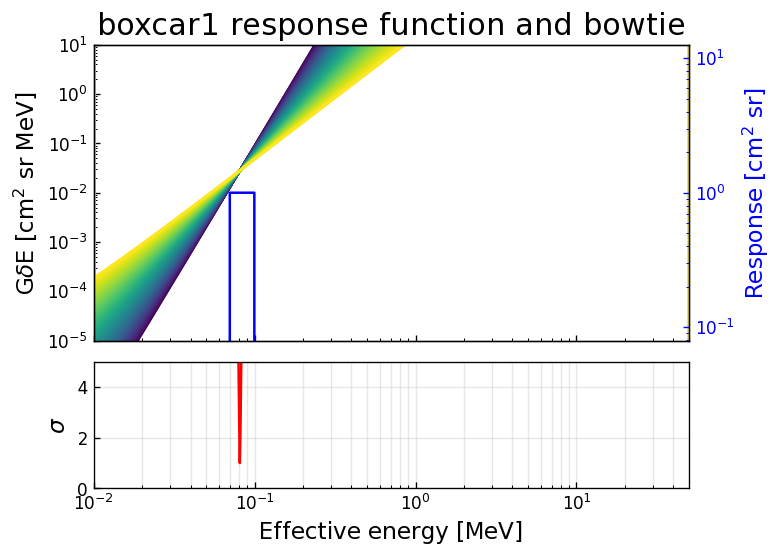

{'eff_e_up': 0.08227496474296567, 'eff_e_lo': 0.07970848958704885}


In [7]:
# bowtie_analysis is a class method for a single channel bowtie analysis with the given spectra
# The method takes as an input the channel on which bowtie analysis is applied on, the range of 
# spectra used (contained in the spectra object that we initialized earlier) and a boolean switch
# to produce a plot to visualize the calculation.

channel = "boxcar1"
produce_plot = True

b1_results = bowtie.bowtie_analysis(channel=channel, spectra=spectra, plot=produce_plot)

### The bowtie_analysis()-method returns a dictionary that contains the results of the analysis.
    geometric_factor : {float} The geometric factor G\DeltaE in cm^2 sr MeV
    geometric_factor_errors (absolute) : {dict} with 'gfup' : {float}, and 'gflo' : {float}
    effective_energy : {float} The effective energy in MeV
    effective_energy_errors (absolute) : {dict} with 'eff_e_up' : {float}, and 'eff_e_lo' : {float}
    fig : {plt.Fig} if plot==True. The figure that visualizes the spectra and the response function
    ax : {tuple(plt.Axes)} if plot==True. The two pairs of axes of the figure.

In [8]:
b1_results

{'geometric_factor': 0.02783532881086404,
 'geometric_factor_errors': {'gfup': np.float64(0.00015185377096835553),
  'gflo': np.float64(0.00010571189187651153)},
 'effective_energy': np.float64(0.0809),
 'effective_energy_errors': {'eff_e_up': np.float64(0.0013749647429656675),
  'eff_e_lo': np.float64(0.0011915104129511522)},
 'fig': <Figure size 768x576 with 3 Axes>,
 'axes': (<Axes: title={'center': 'boxcar1 response function and bowtie'}, ylabel='G$\\delta$E [cm$^2$ sr MeV]'>,
  <Axes: xlabel='Effective energy [MeV]', ylabel='$\\sigma$'>)}

### Running the analysis on a different set of spectra:

If one wants to tune the limits of spectra used in the analysis, it can easily be done with the `.set_spectral_indices()`-method, and reproducing a set of power law spectra with `.produce_power_law_spectra()`.

In [9]:
new_gamma_min = -3.5
new_gamma_max = -1.5

spectra.set_spectral_indices(gamma_min=new_gamma_min, gamma_max=new_gamma_max)
spectra.produce_power_law_spectra(response_df=response_df)

With a different set of spectra, bowtie analysis will yield different results.

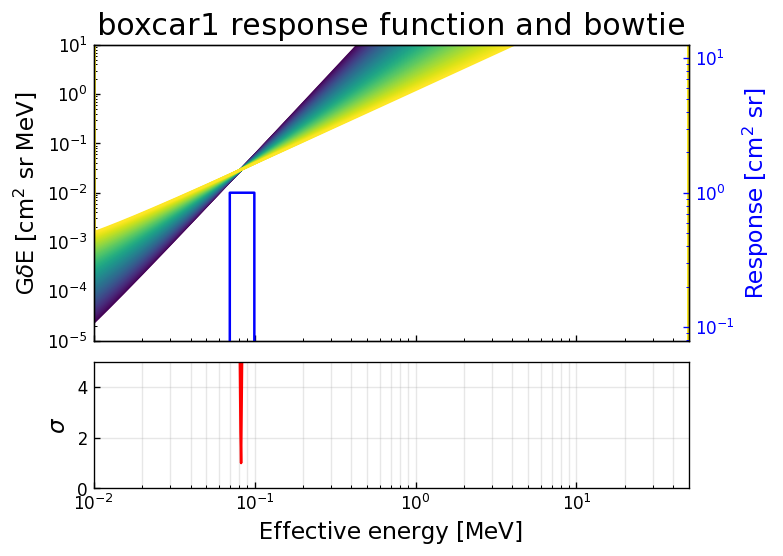

{'geometric_factor': 0.02945031431749762,
 'geometric_factor_errors': {'gfup': np.float64(8.885965640134663e-05),
  'gflo': np.float64(5.596433236966167e-05)},
 'effective_energy': np.float64(0.0824),
 'fig': <Figure size 768x576 with 3 Axes>,
 'axes': (<Axes: title={'center': 'boxcar1 response function and bowtie'}, ylabel='G$\\delta$E [cm$^2$ sr MeV]'>,
  <Axes: xlabel='Effective energy [MeV]', ylabel='$\\sigma$'>)}

In [10]:
new_b1_results = bowtie.bowtie_analysis(channel=channel, spectra=spectra, plot=produce_plot)
new_b1_results

### Running the analysis on all channels in the file:

The `bowtie_analysis_full_stack()`-method is a wrapper for the `bowtie_analysis()`-method. It runs bowtie analysis automatically on all the columns in the csv table that was fed to the Bowtie class. The method returns a list that contains a dictionary of results described above for each channel.

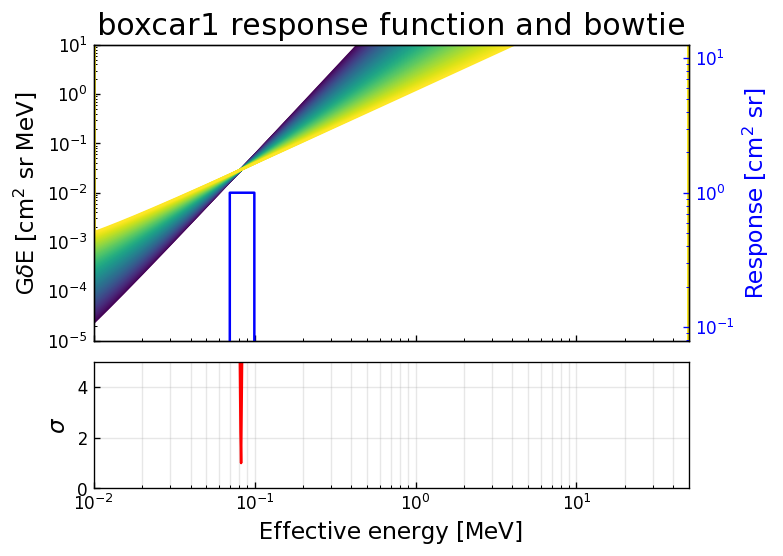

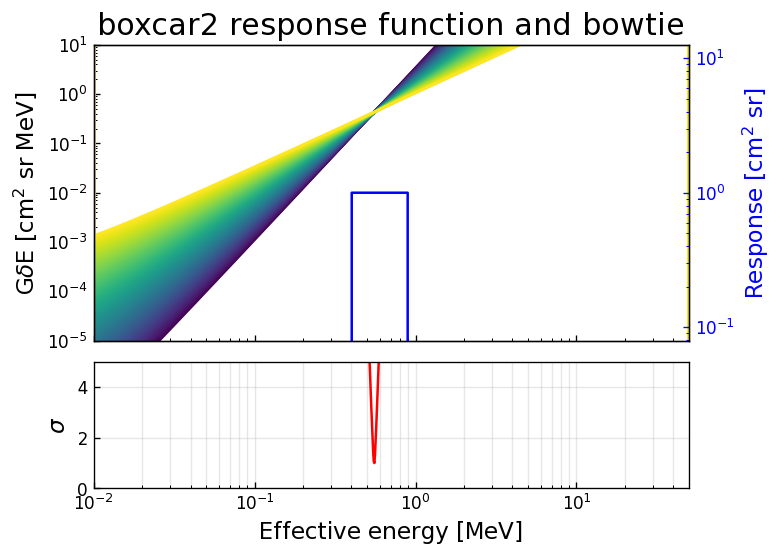

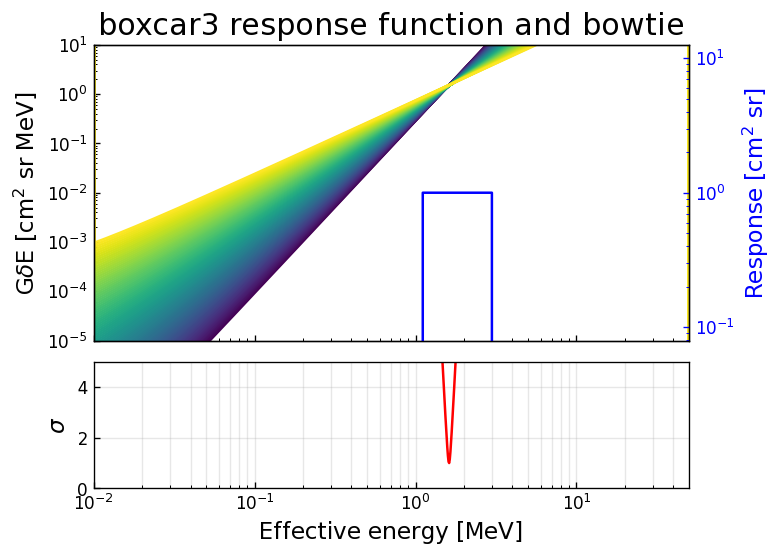

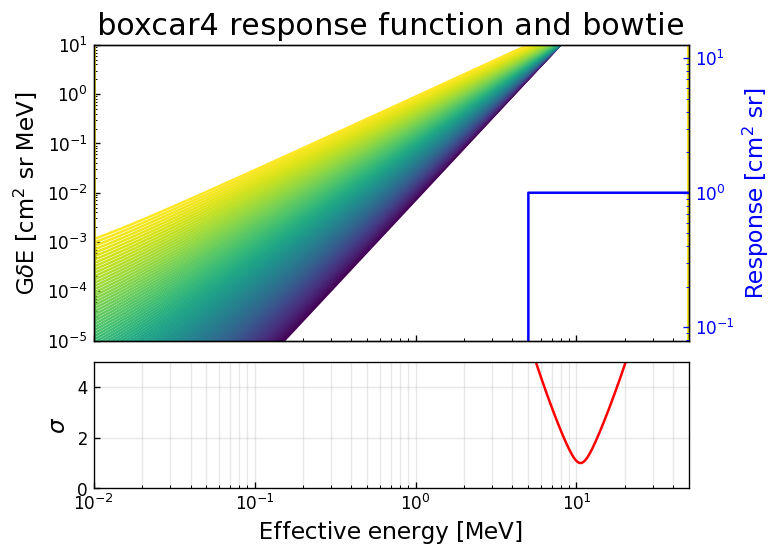

In [11]:
# 
all_channels_results = bowtie.bowtie_analysis_full_stack(spectra=spectra, plot=produce_plot)

## Bowtie analysis for an integral channel
---

Notice how the bowtie analysis result looks off for `boxcar4`. This is because `boxcar4` is not a box-like response, but is instead a step after which the response remains constant to infinity. Such channels are called integral channels, and they observe all particles above a certain threshold energy.

Running bowtie analysis for an integral channels requires explicitly setting `bowtie_method = "integral"` for the `bowtie_analysis()` method. If not provided, this parameter is by default set to `bowtie_method = "differential"`.

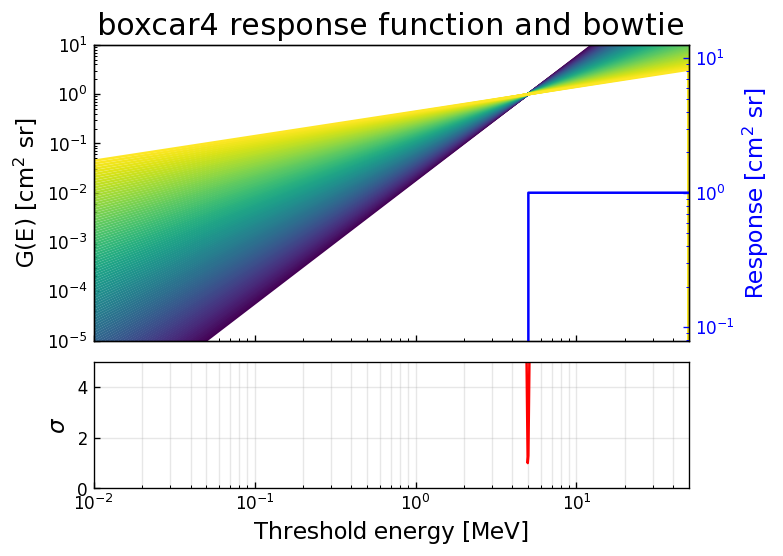

In [12]:
channel = "boxcar4"
bowtie_method = "integral"

b4_results = bowtie.bowtie_analysis(channel=channel, spectra=spectra,
                                    plot=produce_plot, bowtie_method=bowtie_method)

Instead of an effective energy for the channel, integral bowtie analysis returns an effective threshold energy, that indicates the energy at which the step from no response to a response happens.

In [13]:
# Calling the b4_results dictionary displays the results of the integral bowtie analysis
b4_results

{'geometric_factor': 0.9927950947299083,
 'geometric_factor_errors': {'gfup': np.float64(0.0030737165893933716),
  'gflo': np.float64(0.003365956433684758)},
 'threshold_energy': np.float64(4.9804),
 'fig': <Figure size 768x576 with 3 Axes>,
 'axes': (<Axes: title={'center': 'boxcar4 response function and bowtie'}, ylabel='G(E) [cm$^2$ sr]'>,
  <Axes: xlabel='Threshold energy [MeV]', ylabel='$\\sigma$'>)}

In [14]:
# Replace the bowtie analysis result for a differential channel of "boxcar4", with the 
# result acquired by integral bowtie analysis
all_channels_results[3] = b4_results

## Saving the results to a file (and figures):
---

The utility function `save_results()` saves the results of analysis to a csv table, where each channels gets its own column, and the results (geometric factor, its errors and the effective energy) are listed as rows.

`save_results()` accepts the following parameters:

results : {list[dict]} A list of results, as returned by the `.bowtie_analysis_full_stack()`-method. 
    
filename : {str} A name for the file that you save the results into.

column_names : {list} The names for the columns in the csv table. Optional.

save_figures : {bool} A boolean switch to also save the figures (if one produced them). Optional.


In [15]:
from bowtie.bowtie_util import save_results

# Input parameters for the saving function
filename = "name_for_your_table.csv"

# Same column names as in the input csv.
column_names = response_df.columns

save_figures = False

save_results(results=all_channels_results, filename=filename,
             column_names=column_names, save_figures=save_figures)

At least one integral bowtie result in the results. The threshold energy will appear in the 'effective_energy' column.
